# Boxplots With Matplotlib

Boxplots are a great tool for data visualisation, they can be used to understand the distribution of your data, whether it is skewed or not, and whether any outliers are present. In this article we will look at what boxplots are and how we can display them using pandas and matplotlib.

To accompany this article, I have made the following [YouTube Video](https://youtu.be/IpMhMUcmLJw)

https://youtu.be/IpMhMUcmLJw

## What are Boxplots?
A boxplot is a graphical and standardised way to display the distribution of data based on five key numbers: The "minimum",  1st Quartile (25th percentile), median (2nd Quartile./ 50th Percentile), the 3rd Quartile (75th percentile) and the "maximum". The minimum and maximum values are defined as Q1 - 1.5 * IQR  and Q3 + 1.5 * IQR respectively. Any points that fall outside of these limits are referred to as outliers.

Boxplots can be used to:
- Identify outliers or anomalous data points
- To determine if our data is skewed
- To understand the spread/range of the data

To construct a boxplot, we first start with the median value / 50th percentile (Q2). This represents the middle value within our data.

A box is then formed between the 25th and 75th percentiles (Q1 and Q3 respectively). The range represented by this box is known as the inter-quartile range (IQR). 

From this box extends lines, which are also knwon as the whiskers. These extend to Q1 - 1.5 * IQR and Q3 + 1.5 * IQR or to the last data point if it is less than this value. 

Any points that fall beyond the whisker limits are known as outliers.



## Importing Libraries and Data

The first few steps we will carry out in our Jupyter Notebook is loading in the libraries and data. In this case we are going to be using [lasio](https://lasio.readthedocs.io/en/latest/) to load our las file, [pandas](https://pandas.pydata.org/) for storing our well log data, and [matplotlib](https://matplotlib.org/) for visualising our data.


Lasio is a library that you may not be familiar with, but it is used to load log ascii standard files which are commonly used within the oil and gas industry for storing and transferring well log data. You can check out my [first YouTube video](https://youtu.be/8U4gxMJybJs) which explains how to use this library.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import lasio

Next we will load in and view our data. We can do this using `lasio.read()` and passing in a text string. I have appended `.df()` to the end of this in order to convert it to a pandas dataframe.

The dataset we are using comes from the publicly available [Equinor Volve Field dataset released in 2018](https://www.equinor.com/en/what-we-do/norwegian-continental-shelf-platforms/volve.html). The file used in this tutorial is from well 15/9- 19SR which contains a set of standard well log measurements.

In [2]:
df = lasio.read("Data/15-9-19_SR_COMP.LAS").df()

In [3]:
df

,AC,CALI,DEN,GR,NEU,RDEP,RMED
DEPT,,,,,,,
3615.4340,95.7952,12.7249,2.3429,54.8754,44.5742,0.8941,0.8359
3615.5864,94.2267,12.5961,2.3528,53.5158,62.1103,0.7367,0.8028
3615.7388,101.3254,13.7632,2.3170,48.9803,71.9087,0.6423,0.7958
3615.8912,99.5672,14.3249,2.2585,36.6762,44.8988,0.6571,0.7929
3616.0436,100.5965,11.1429,2.2108,40.4632,49.5744,0.7442,0.7940
...,...,...,...,...,...,...,...
4635.9044,NaN,NaN,NaN,NaN,NaN,0.7729,0.5978
4636.0568,NaN,NaN,NaN,NaN,NaN,0.8369,0.6257
4636.2092,NaN,NaN,NaN,NaN,NaN,0.8741,0.6888


When we call the dataframe, we can see that we have a table representing the first 5 and last 5 rows of the data. Each column represents a logging measurement. Going from left to right, we have AC for Acoustic Compressional Slowness, CALI for borehole caliper, DEN for Bulk Density, GR, for Gamma Ray, NEU for Neutron Porosity and RDEP and RMED for deep and medium resistivity.

In order to work with some of the matplotlib plots, it is necessary to remove missing values which are represented by NaN. We can remove these by using `.dropna()`. Adding `inplace=True` allows us to remove these from the original dataframe rather than a copy of it.

In [4]:
df.dropna(inplace=True)

When we call `df` again, we can see that the number of rows has reduced from 6701 to 6579.

In [5]:
df

,AC,CALI,DEN,GR,NEU,RDEP,RMED
DEPT,,,,,,,
3615.4340,95.7952,12.7249,2.3429,54.8754,44.5742,0.8941,0.8359
3615.5864,94.2267,12.5961,2.3528,53.5158,62.1103,0.7367,0.8028
3615.7388,101.3254,13.7632,2.3170,48.9803,71.9087,0.6423,0.7958
3615.8912,99.5672,14.3249,2.2585,36.6762,44.8988,0.6571,0.7929
3616.0436,100.5965,11.1429,2.2108,40.4632,49.5744,0.7442,0.7940
...,...,...,...,...,...,...,...
4617.3116,40.0000,6.0000,2.5547,87.1958,15.4080,2.6787,2.1338
4617.4640,40.0000,6.0000,2.5662,90.9071,15.8777,2.6239,2.0865
4617.6164,40.0000,6.0000,2.5702,86.2190,15.8576,2.5898,2.0461


## Simple Box Plots Using Pandas

Now that our data has been loaded we can generate our very first boxplot. We can do this by typing `df['GR']` which selects the GR column from the dataframe, followed by `.plot()`. 

Within the arguments for the plot method, we pass in `kind=box` to tell the function we want a boxplot.

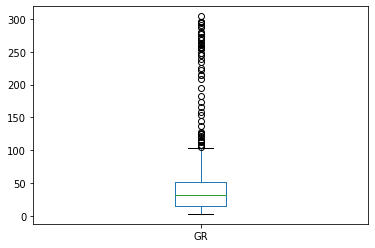

In [6]:
#Simple boxplot using pandas
df['GR'].plot(kind='box');

When we run this cell, we get a very basic looking box plot. We have the inter quartile range box, which contains the median line. Extending from either side are the whiskers which extend to 1.5 times the inter quartile range. And then at the top here we have a series of circles, which represent outliers.

### Boxplots with Logarithmic Axes

We can look at another curve, in this case RDEP (deep resistivity).

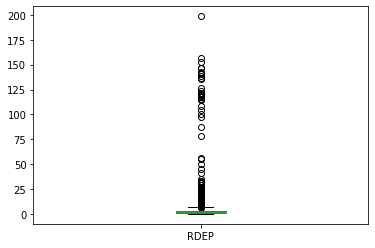

In [7]:
#Viewing logarithmically scaled data
df['RDEP'].plot(kind='box');

If we repeat the same code as above, we can see that we have a tiny box down the bottom of the plot and a large number of outliers above that. From experience and prior knowledge, RDEP is usually plotted on a logarithmic scale and can range from lows of around 0.01 ohmm to around several thousand ohmm.

To solve this we can switch the Y-axis to a logarithmic scale by adding in `plt.semilogy()`. You will see here that we are now using matplotlib notation, and that is because pandas is calling upon matplotlib to build this box plot.

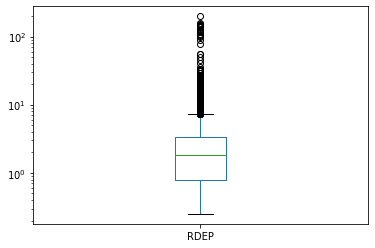

In [8]:
df['RDEP'].plot(kind='box')
plt.semilogy();

### Making Boxplots Horizontal

If we prefer to view our boxplots horizontally, we can add in a `vert` argument which is used to tell the plot to appear either vertical (True) or horizontal (False). By default, it is set to True. 

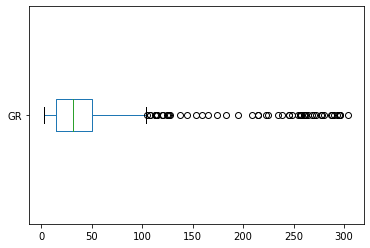

In [9]:
#Rotating the box plot so it is horizontal
df['GR'].plot(kind='box', vert=False);

## Boxplots with Matplotlib

The above code cells have been done using the pandas wrapper around matplotlib, if we want to use matplotlib functions and syntax we can generate the same plot as follows. First we call `plt.boxplot()` and then set the x argument to `df['GR']`.

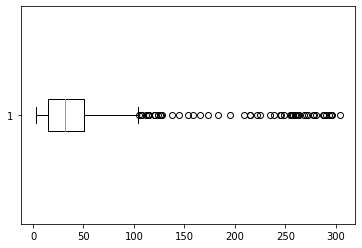

In [10]:
#Using matplotlib to make a boxplot
plt.boxplot(x=df['GR'], vert=False);

## Styling the Boxplot

Matplotlib plots are not very stylish and the code used to generate them is very low level. This is why there have been a number of libraries, such as seaborn, that have been developed based on matplotlib, and bring in so much more to make the visualisations more appealing. 

First, we will add some colour to our plot by changing the colour of the outlier circles. To do this we create a new variable called `red_circle` and then we create a dictionary. Within this dictionary, we will set the the `markerfacecolor` and `marker`. These will be set these to red and to a circle respectively.

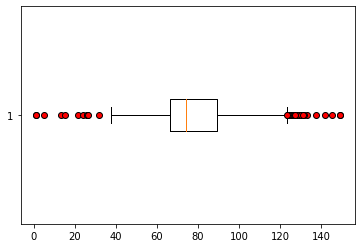

In [11]:
#Changing the outlier markers
red_circle = dict(markerfacecolor='red', marker='o')
plt.boxplot(x=df['AC'], vert=False, flierprops=red_circle);

When we run this code, we now have some colour to highlight our outliers.

On the current boxplot we have the median value represented by an orange line within our IQR box. We can also add on the mean of our data by creating another dictionary variable called `mean_shape`. 

We set up the same parameters as before for the `markerfacecolor` and the `marker`, which will both be set to green and a diamond. To choose a diamond, we can use the letter D. 

Additionally, we will change the edge colour of our mean marker by adding in a `markeredgecolor` variable. By default it is set to black, but here we will set it to green.

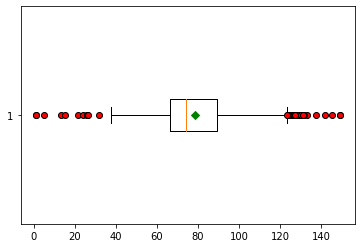

In [12]:
#Adding the mean
red_circle = dict(markerfacecolor='red', marker='o')
mean_shape = dict(markerfacecolor='green', marker='D', markeredgecolor='green')

plt.boxplot(x=df['AC'], vert=False, flierprops=red_circle, 
             showmeans=True, meanprops=mean_shape);

### Adding a Notch

Instead of representing the median as a line, we can represent it by using a notch instead. This is done by simply by adding the argument `notch` and setting it to True.

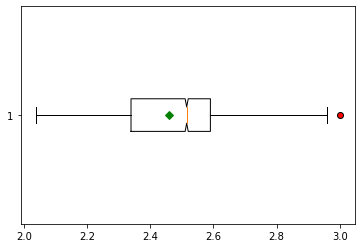

In [13]:
#Adding the median notch to the box
red_circle = dict(markerfacecolor='red', marker='o')
plt.boxplot(x=df['DEN'], vert=False, flierprops=red_circle, 
             showmeans=True, meanprops=mean_shape, notch=True);

## Displaying Multiple Boxplots on a Figure

There may be occassions where we want to create multiple boxplots on the same figure. The simplest way is to call `df.plot()`, and pass in `kind=True`. 

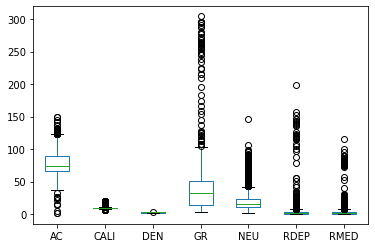

In [14]:
#Displaying all columns in the dataframe on a single figure
df.plot(kind='box');

This generates a plot with all of our columns, but it is not very appealing. Also, all of our measurements are on different measurement ranges. GR can typically range from 0 to 200 API, whereas DEN typically ranges from about 1.5 g/cc to around 3 g/cc.

This can make it very difficult to read and identify outliers within the data. To make boxplots with different y-axes and to make a figure that is readable as well as useable we need to use subplots. If you want to find out more about subplots in matplotlib, [please check out my previous video which covers subplot2grid.](https://youtu.be/pPqLgmbyets)


First we start be defining our outliers as a red underscore circle.

```python
red_circle = dict(markerfacecolor='red', marker='o', markeredgecolor='white')
```

We then define fig, axs as plt.subplots. In the arguments we pass in that we want 1 row, and then the number of columns. The number of columns will be equal to the length of df.columns. Finally, we will set the figsize to 20 by 10.

```python
fig, axs = plt.subplots(1, len(df.columns), figsize=(20,10))
```

We then need to create a small for loop which will loop over each of our plot axes. We are using the enumerate function here to keep track of i, our index value.

```python
for i, ax in enumerate(axs.flat):
```

Next we can add in our boxplot by calling upon `ax.boxplot()` and passing in df.iloc, which allows us to get columns by the index variable, i. We do this by creating square brackets, with a colon followed by a comma. This tells the iloc function to get all rows, and then we pass in the column index. Next we specify our outlier properties and pass in red_circle.

```python
 ax.boxplot(df.iloc[:,i], flierprops=red_circle)
```

The next couple of lines allows us to set the title and the y tick label font size. At the end we call upon `plt.tight_layout` to space out the plots in a nice way.

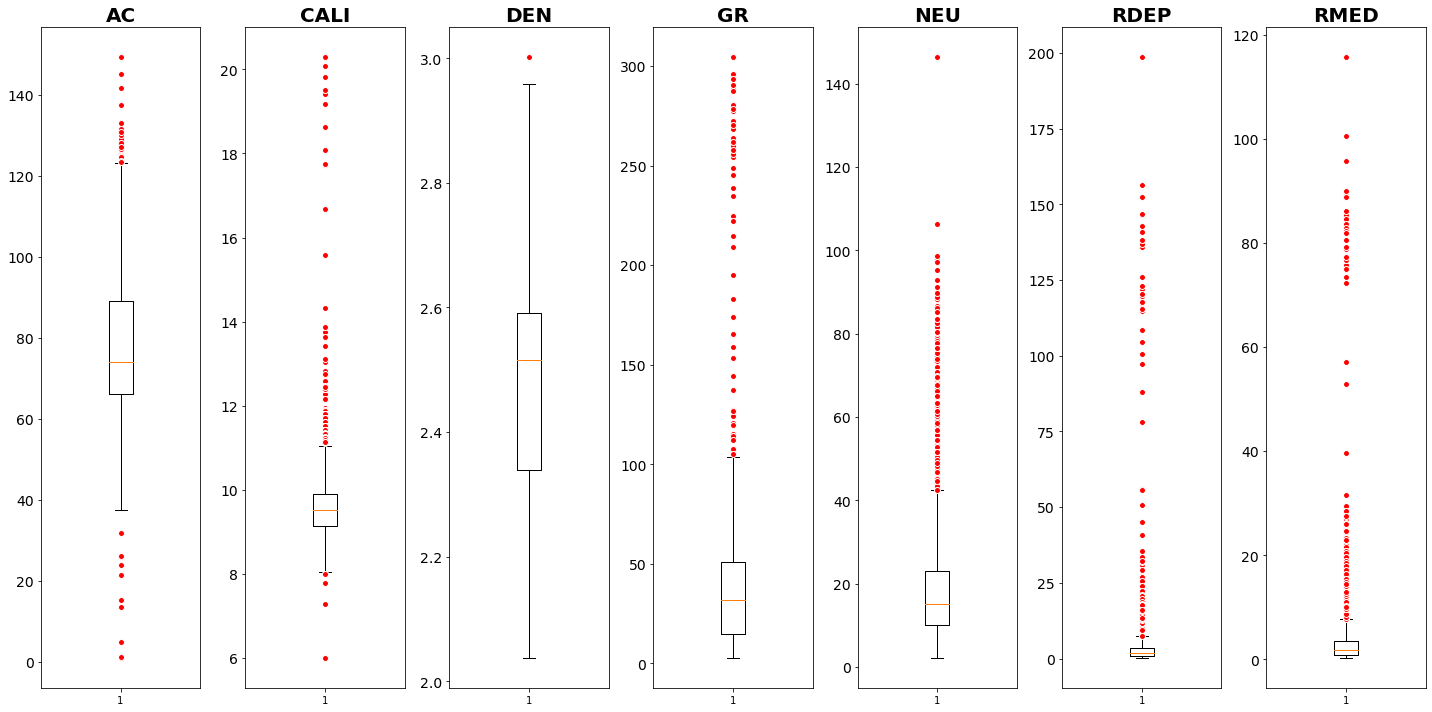

In [15]:
#Creating subplot of each column with its own scale
red_circle = dict(markerfacecolor='red', marker='o', markeredgecolor='white')

fig, axs = plt.subplots(1, len(df.columns), figsize=(20,10))

for i, ax in enumerate(axs.flat):
    ax.boxplot(df.iloc[:,i], flierprops=red_circle)
    ax.set_title(df.columns[i], fontsize=20, fontweight='bold')
    ax.tick_params(axis='y', labelsize=14)
    
plt.tight_layout()

And when we run the cell, we have a much nicer looking plot, that we can read. Each subplot has its own y-axis scale. We can see that CALI, GR and NEU all have a large number of outliers. The final two subplots RMED and RDEP should be scaled logarithmically. 

To catch these, we can add a simple if statement to check if the column names are equal to RDEP and RMED, and then call upon `ax.semilogy()`.

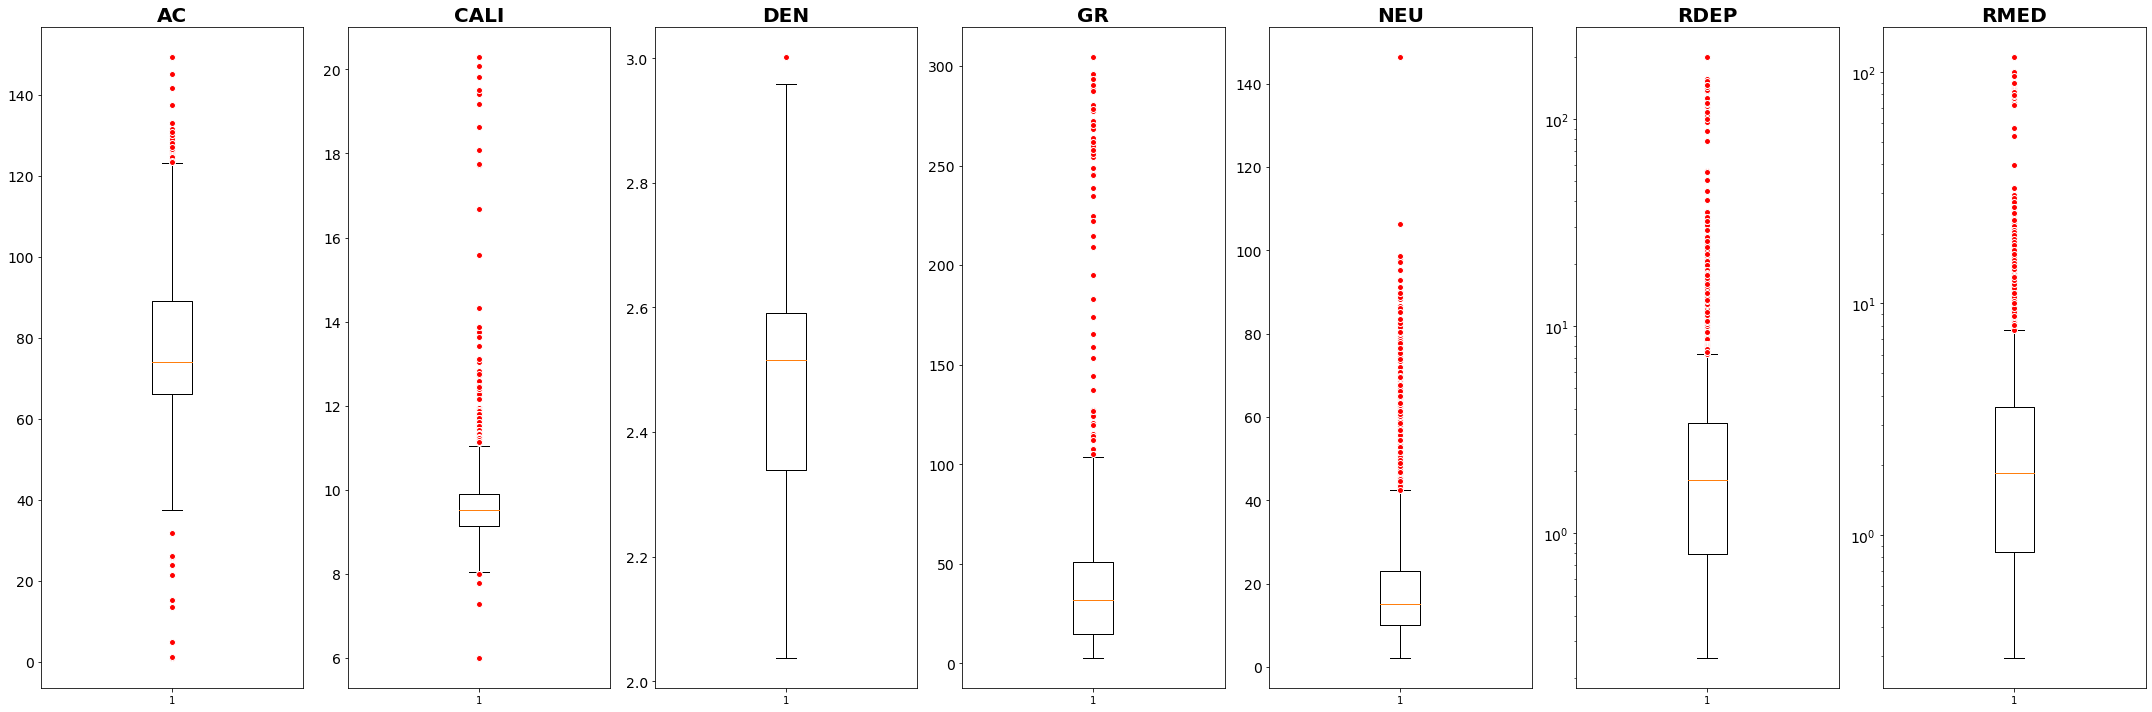

In [16]:
red_circle = dict(markerfacecolor='red', marker='o', markeredgecolor='white')

fig, axs = plt.subplots(1, len(df.columns), figsize=(30,10))

for i, ax in enumerate(axs.flat):
    ax.boxplot(df.iloc[:,i], flierprops=red_circle)
    df.iloc[:,i]
    ax.set_title(df.columns[i], fontsize=20, fontweight='bold')
    ax.tick_params(axis='y', labelsize=14)
    
    #Checking if column names are equal to columns we expect to be logarithmic
    if df.columns[i] == 'RDEP' or df.columns[i] == 'RMED':
        ax.semilogy()
    
plt.tight_layout()

# Summary

In this tutorial we have seen how to create basic boxplots of well log data using matplotlib and pandas, as well as creating single figures with multiple boxplots that have different y-axes / data ranges. Boxplots are very useful data visualisation tools that allow us to understand the range and distribution of the data, as well as identify anomolous data points, also known as outliers.

This is one of many methods that can be used in the Exploratory Data Phase of a project.


---

*Thanks for reading!*

*If you have found this article useful, feel free to check out my other articles looking at various aspects of Python and well log data. You can also find my code used in this article and others at GitHub.*

If you want to get in touch you can find me on LinkedIn or at my website.

Interested in learning more about python and well log data or petrophysics? Follow me on [Medium](https://andymcdonaldgeo.medium.com/) or on [YouTube](https://www.youtube.com/channel/UCn1O_4_ApzbYwrsUdRoMmOg).